# Experiment No. 1
> Aim: Implementation of Linear Regression

## Problem Statement
> Here we going to predicting the price of Houses in boston city.

 **Features List**
> CRIM per capita crime rate by town

> ZN proportion of residential land zoned for lots over 25,000 sq.ft.

> INDUS proportion of non-retail business acres per town

> CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

> NOX nitric oxides concentration (parts per 10 million)

> RM average number of rooms per dwelling

> AGE proportion of owner-occupied units built prior to 1940

> DIS weighted distances to five Boston employment centres

> RAD index of accessibility to radial highways

> TAX full-value property-tax rate per $10,000

> PTRATIO pupil-teacher ratio by town

> B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

> LSTAT % lower status of the population

> MEDV Median value of owner-occupied homes in $1000’s

In [2]:
# importing all important liabraries
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_df = pd.DataFrame(boston["data"],
                        columns = boston['feature_names'])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
# get the data be ready
X = boston_df["TAX"]
y = boston_df['target']



Slope: [-0.02582177]
Intercept: 33.229361919157895
Root mean squared error:  55.63802986480275
R2 score:  0.2413042465957823


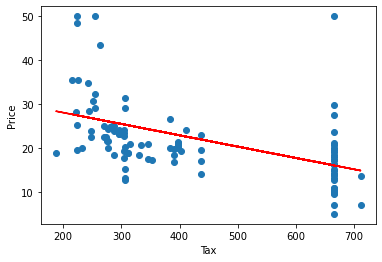

In [15]:
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

#  model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing values
print('Slope:' ,model.coef_)
print('Intercept:',model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X_test, y_test)
plt.xlabel('Tax')
plt.ylabel('Price')

# predicted values
plt.plot(X_test, y_pred, color='r')

plt.show();